In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
df_ispa = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/uji_metode/ku_ispa.csv')

In [17]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   KABKOT      300 non-null    object 
 2   month       300 non-null    int64  
 3   year        300 non-null    int64  
 4   longitude   300 non-null    float64
 5   latitude    300 non-null    float64
 6   pm2p5       300 non-null    float64
 7   time        300 non-null    object 
 8   RH          300 non-null    float64
 9   t2m         300 non-null    float64
 10  tp          300 non-null    float64
 11  ispa        300 non-null    int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 28.3+ KB


**filter data yang dibutuhkan**

In [18]:
# ikutin mau filter apa?
df_ispa_2 = df_ispa[df_ispa['year']==2022]

**nambahin label month**

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_6167/2673836426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ispa_2['month'] = pd.to_datetime(df_ispa_2['time']).dt.month_name()


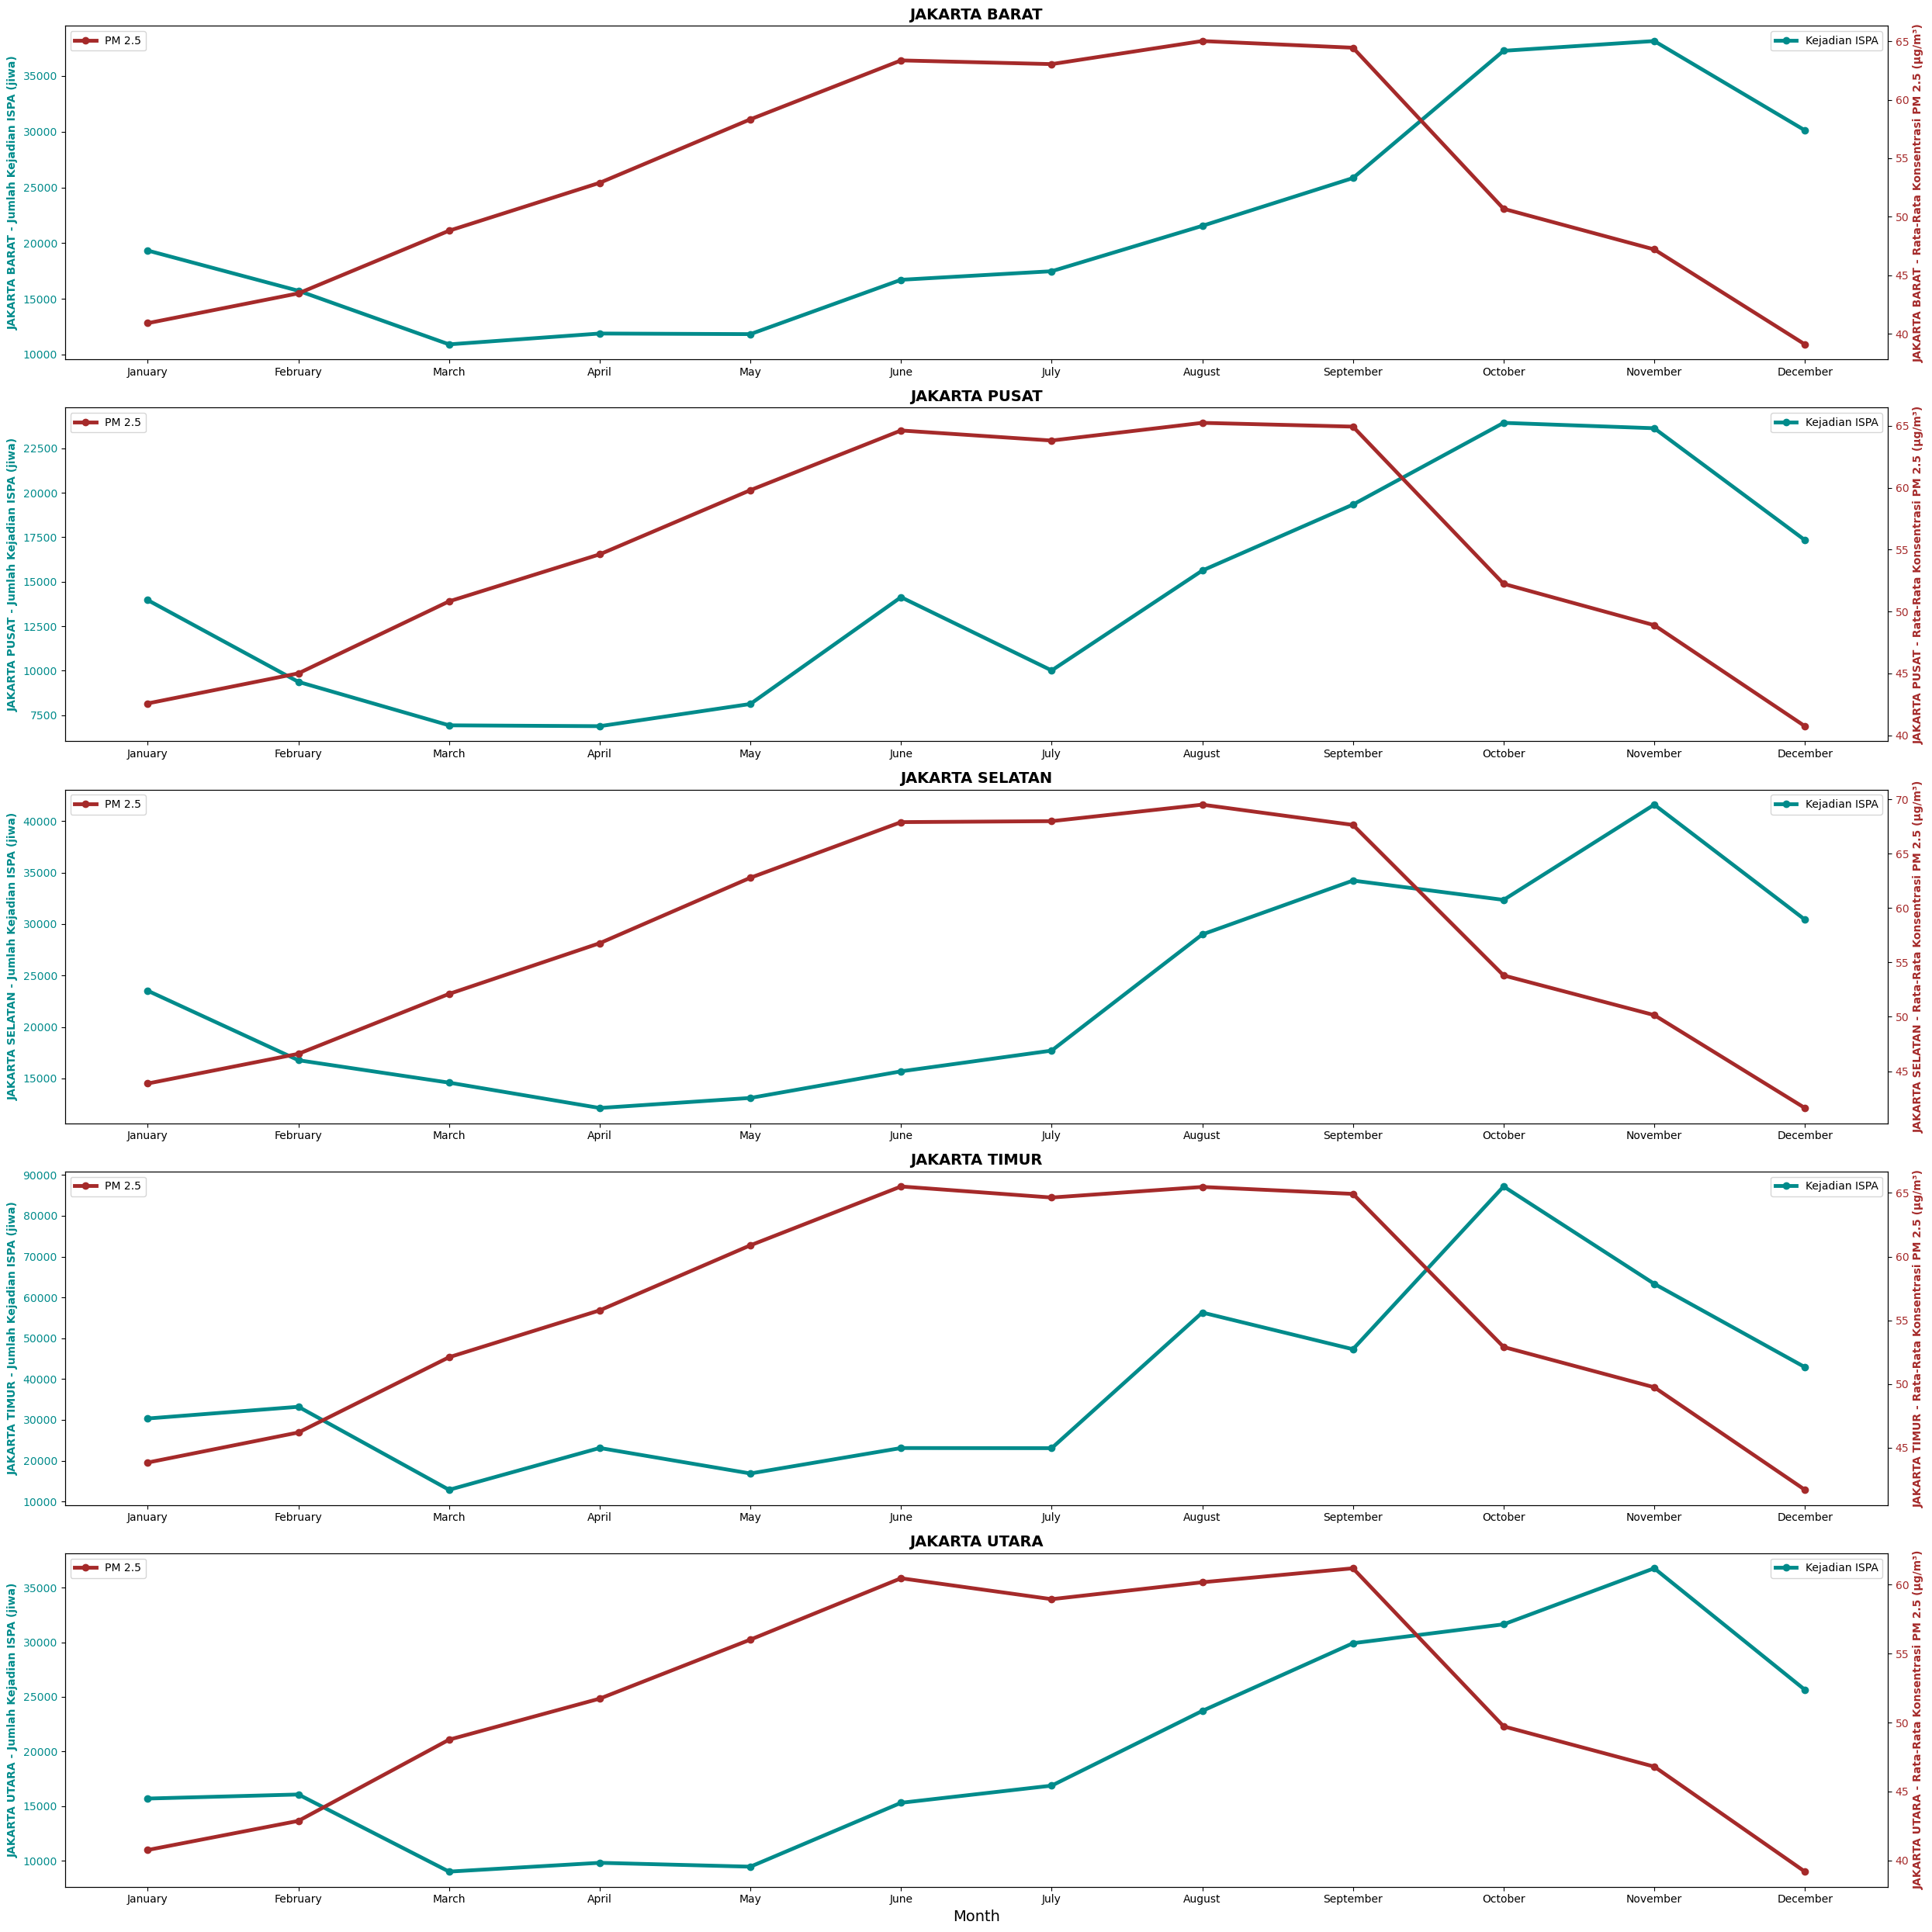

In [19]:
indicators = ['ispa', 'pm2p5']
df_ispa_2['month'] = pd.to_datetime(df_ispa_2['time']).dt.month_name()

# Group data by KABKOT
grouped_data = df_ispa_2.groupby('KABKOT')

# Plot time series for 'tb' and 'pm2p5' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(25, len(grouped_data)*5), sharex=False)


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['ispa']
    y2 = group['pm2p5']

    ax.plot(x, y1, label='Kejadian ISPA', marker='o', linewidth=3.5, color='darkcyan')
    ax.set_ylabel(f'{name} - Jumlah Kejadian ISPA (jiwa)', color='darkcyan', weight='bold')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='PM 2.5', marker='o',linewidth=3.5, color='brown')
    ax2.set_ylabel(f'{name} - Rata-Rata Konsentrasi PM 2.5 (µg/m³)', color='brown', weight='bold')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper right')
    ax2.legend(loc= 'upper left')

# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', weight='bold', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR', weight='bold', fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', weight='bold', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', weight='bold', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', weight='bold', fontsize= 14)

plt.tight_layout()
plt.show()